# **Predicciones de Ventas Alimenticias**
## Erwin Barriga

In [840]:
import pandas as pd
import numpy as np

In [841]:
filename = "./sales_predictions.csv"

In [842]:
df = pd.read_csv(filename)
df.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### ¿Cuántas filas y columnas?

In [843]:
df.shape

(8523, 12)

### ¿Cuáles son los tipos de datos en cada variable?

In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### ¿Hay duplicados?

In [845]:
df.duplicated().sum()

0

###  Identifiquen los valores faltantes.

In [846]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Columna: Item Weight

In [847]:
# dataframe donde "Item_Weight" == NaN
df[(df["Item_Weight"].isna())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


Tomando un item al azar, hay filas donde el peso de ese item ha sido registrado con un mismo valor

In [848]:
df[df["Item_Identifier"] == "FDU28"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
6362,FDU28,NaN,Regular,0.164439,Frozen Foods,188.4214,OUT019,1985,Small,Tier 1,Grocery Store,376.8428
6419,FDU28,19.2,Regular,0.094301,Frozen Foods,187.5214,OUT018,2009,Medium,Tier 3,Supermarket Type2,1695.7926
7597,FDU28,NaN,Regular,0.093464,Frozen Foods,189.1214,OUT027,1985,Medium,Tier 3,Supermarket Type3,2261.0568
8419,FDU28,19.2,Regular,0.093918,Frozen Foods,189.8214,OUT046,1997,Small,Tier 1,Supermarket Type1,942.1070


**Estrategia:**

Buscar todos los items que tienen peso NaN, usar los valores de peso registrado en otras filas para inferir el valor de peso que sustituya los NaN

In [849]:
#* Extraer los "Item_Identifier" donde "Item_Weight" == NaN
df_items = df[(df["Item_Weight"].isna())]["Item_Identifier"]
df_items

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

In [850]:
df_items.duplicated().sum()

321

In [851]:
df_items = df_items.drop_duplicates()
df_items.duplicated().sum()

0

In [852]:
# Generar lista python de Items cuyo peso sea NaN
nanItemList = df_items.to_list()
#print(nanItemList)


In [853]:
# Remplazar NaN por valor de peso registrado en otras filas
for item in nanItemList:
    # print()
    # print(df[df["Item_Identifier"] == item]["Item_Weight"])
    ps_peso_item = df[df["Item_Identifier"] == item]["Item_Weight"]
    # print(ps_peso_item)
    valor_reemplazo = ps_peso_item.mean()
    df.loc[(df["Item_Identifier"] == item) & (df["Item_Weight"].isna()), "Item_Weight"] = valor_reemplazo

Verificar cuantos NaN quedan en la columna "Item_Weight"

In [854]:
df["Item_Weight"].isna().sum()

4

In [855]:
df[df["Item_Weight"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


4 items únicos cuyo peso no está registrado de un universo de 8523 -> Eliminamos esas cuatro filas

In [856]:
df.dropna(subset=['Item_Weight'], inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Columna: Outlet_Size
Realizamos algunas consultas para establecer algún patrón que relacione los valores NaN de la columma "Outlet_Size" con otras columnas

In [857]:
# 3 tipos de valores posibles para la columna Size
df[["Outlet_Size"]].value_counts()

Outlet_Size
Medium         2790
Small          2387
High            932
dtype: int64

In [858]:
# Dataframe donde "Outlet_Size" == NaN
df[df["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [859]:
# Los  Outlet_Identifier que tienen la columna Size = NaN, lo tienen en todo el registro
df[df["Outlet_Identifier"] == "OUT010"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


In [860]:
#   Todos los Outlets que tienen la columna Size igual a NaN, agrupados por "Outlet_Type"
df[df["Outlet_Size"].isna()]["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [861]:
#   Todos los Outlet_Types que son Grocery Store, tienen la columna Size igual "Small"
df[(df["Outlet_Type"]=="Grocery Store")]["Outlet_Size"].value_counts()

Small    527
Name: Outlet_Size, dtype: int64

**Estrategia:**

Para todos los outlets cuyo tamaño es NaN y que sean del tipo "Grocery Store", usar el valor "Small" como sustituto.

In [862]:
df.loc[(df["Outlet_Type"]=="Grocery Store") & (df["Outlet_Size"].isna()), "Outlet_Size"] = "Small"
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1855
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se redujo el número de NaNs

In [863]:
# Valores la columna Size cuyo Outlet_Types es igual a "Supermarket Type1"
df[(df["Outlet_Type"]=="Supermarket Type1")]["Outlet_Size"].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64

No hay correlación entre los Outlet_Types que son "Supermarket Type1" y la columna Size

In [864]:
# Valores de la columna "Outlet_Location_Type" para todos los valores NaN en "Outlet_Size"
df[df["Outlet_Size"].isna()]["Outlet_Location_Type"].value_counts()

Tier 2    1855
Name: Outlet_Location_Type, dtype: int64

Sin ambargo, todos los valores NaN en "Outlet_Size" son "Tier 2" en la columna "Outlet_Location_Type"

In [865]:
# Agrupación de la columna "Outlet_Type" = "Supermarket Type1" por Outlet_Type y Outlet_Location_Type
df[(df["Outlet_Type"]=="Supermarket Type1")].groupby(['Outlet_Type', 'Outlet_Location_Type'])["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Name: Outlet_Size, dtype: int64

Vemos que para todas las filas cuyo "Outlet_Type" = "Supermarket Type1" y "Outlet_Location_Type" = "Tier 2", el "Outlet_size" es "Small"

**Estrategia:**

Para todos los outlets cuyo tamaño es NaN y que sean del tipo "Supermarket Type1" y "Tier2", usar el valor "Small" como sustituto.

In [866]:
df.loc[(df["Outlet_Type"]=="Supermarket Type1") & (df["Outlet_Location_Type"]=="Tier 2") & (df["Outlet_Size"].isna()), "Outlet_Size"] = "Small"


### Confirmen que no hay valores faltantes

In [867]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Encuentren y arreglen alguna categoría inconsistente de datos

In [868]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [869]:
df["Item_Fat_Content"].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [870]:
df.loc[df["Item_Fat_Content"] == "LF", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"] == "low fat", "Item_Fat_Content"] = "Low Fat"
df.loc[df["Item_Fat_Content"] == "reg", "Item_Fat_Content"] = "Regular"

df["Item_Fat_Content"].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [871]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [872]:
df["Outlet_Size"].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [873]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [874]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

###  Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno

In [875]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<hr>

# <center>Parte 3 (base)</center>

In [876]:
import matplotlib.pyplot as plt
import seaborn as sns

In [877]:
%%capture --no-display
plt.style.use('seaborn')
sns.color_palette("deep", 7)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411)]

In [878]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Histograma para ver las distribuciones de diversas características en el conjunto de datos

#### Cantidad de items vendidos 

In [879]:
items_vendidos_local = round(df["Item_Outlet_Sales"] / df["Item_MRP"], 0)
items_vendidos_local

0       15.0
1        9.0
2       15.0
3        4.0
4       18.0
        ... 
8518    13.0
8519     5.0
8520    14.0
8521    18.0
8522    10.0
Length: 8519, dtype: float64

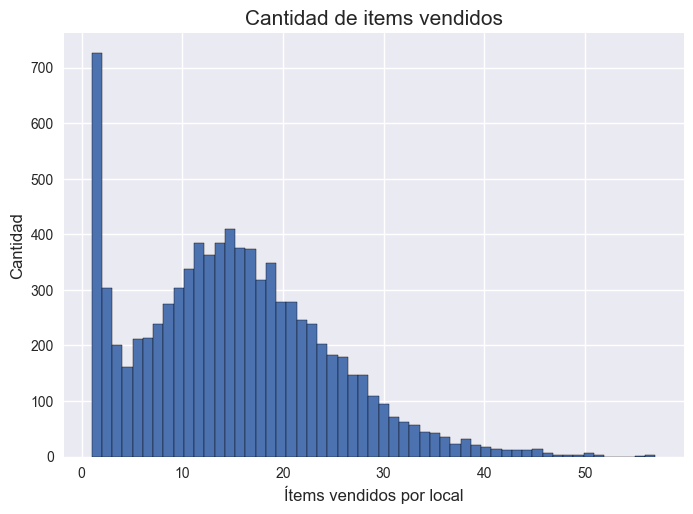

In [880]:
items_vendidos_local.hist(bins = 55, edgecolor='black')
plt.ylabel('Cantidad')
plt.xlabel('Ítems vendidos por local')
plt.title("Cantidad de items vendidos", {"fontsize":15});

`Los locales han vendido con mayor frecuencia un ítem una (1) sola vez. El segundo escenario más frecuente ha sido la venta de alrededor de 15 ítems`

#### Número de locales establecidos por año

In [881]:
año_apertura_local = df.groupby('Outlet_Identifier')["Outlet_Establishment_Year"].mean()
año_apertura_local

Outlet_Identifier
OUT010    1998.0
OUT013    1987.0
OUT017    2007.0
OUT018    2009.0
OUT019    1985.0
OUT027    1985.0
OUT035    2004.0
OUT045    2002.0
OUT046    1997.0
OUT049    1999.0
Name: Outlet_Establishment_Year, dtype: float64

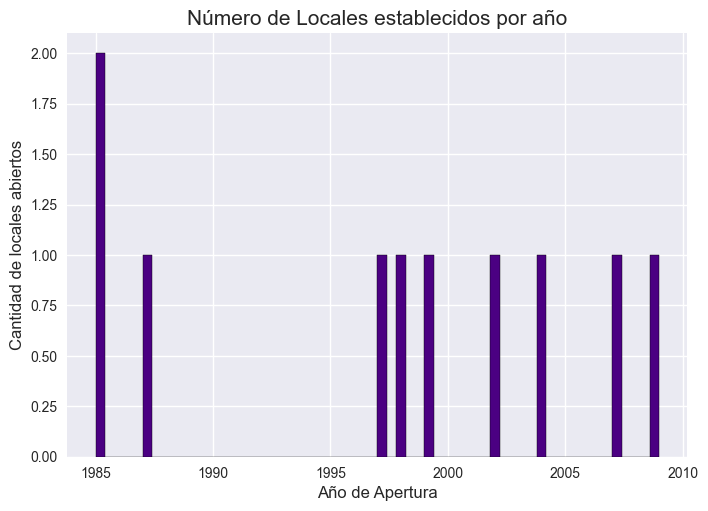

In [882]:
año_apertura_local.hist(bins = 60, edgecolor='black', color="indigo")
plt.ylabel('Cantidad de locales abiertos')
plt.xlabel('Año de Apertura')
plt.title("Número de Locales establecidos por año", {"fontsize":15});

### Distribución del valor del precio promedio por ítem

In [883]:
# Ejemplo del valor de precio de un item en cada local
df[df["Item_Identifier"] == "FDF22"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
406,FDF22,6.865,Low Fat,0.056919,Snack Foods,212.8218,OUT049,1999,Medium,Tier 1,Supermarket Type1,5770.4886
2077,FDF22,6.865,Low Fat,0.056831,Snack Foods,214.0218,OUT046,1997,Small,Tier 1,Supermarket Type1,5556.7668
3042,FDF22,6.865,Low Fat,0.056820,Snack Foods,212.6218,OUT035,2004,Small,Tier 2,Supermarket Type1,2137.2180
4852,FDF22,6.865,Low Fat,0.056946,Snack Foods,214.6218,OUT045,2002,Small,Tier 2,Supermarket Type1,1923.4962
5877,FDF22,6.865,Low Fat,0.057152,Snack Foods,211.8218,OUT017,2007,Small,Tier 2,Supermarket Type1,4915.6014
7906,FDF22,6.865,Low Fat,0.095123,Snack Foods,212.3218,OUT010,1998,Small,Tier 3,Grocery Store,427.4436
8044,FDF22,6.865,Low Fat,0.057062,Snack Foods,212.0218,OUT018,2009,Medium,Tier 3,Supermarket Type2,2350.9398
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [884]:
precio_promedio_item = df.groupby("Item_Identifier")["Item_MRP"].mean()
precio_promedio_item

Item_Identifier
DRA12    141.865400
DRA24    164.086800
DRA59    185.179900
DRB01    189.586333
DRB13    189.693000
            ...    
NCZ30    120.752657
NCZ41    125.630400
NCZ42    236.644800
NCZ53    188.321400
NCZ54    162.255200
Name: Item_MRP, Length: 1555, dtype: float64

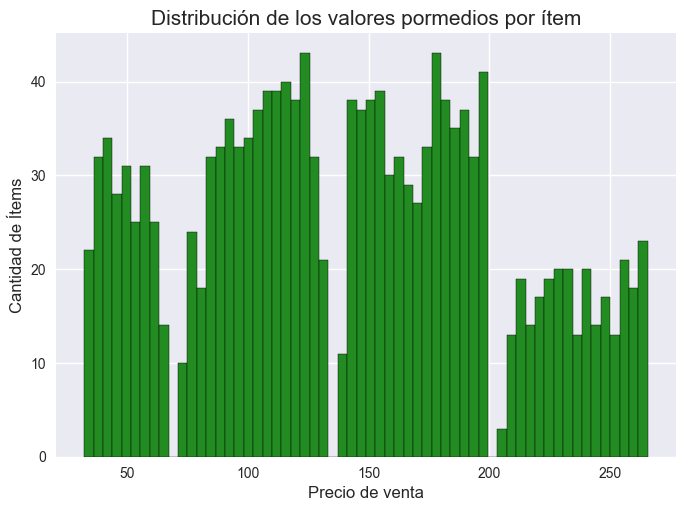

In [885]:
precio_promedio_item.hist(bins = 60, edgecolor='black', color="forestgreen")
plt.ylabel('Cantidad de Ítems')
plt.xlabel('Precio de venta')
plt.title("Distribución de los valores pormedios por ítem", {"fontsize":15});

## Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

In [886]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Distribución de ventas totales por locales

In [887]:
# df.boxplot(column="Item_Outlet_Sales", by="Outlet_Identifier")

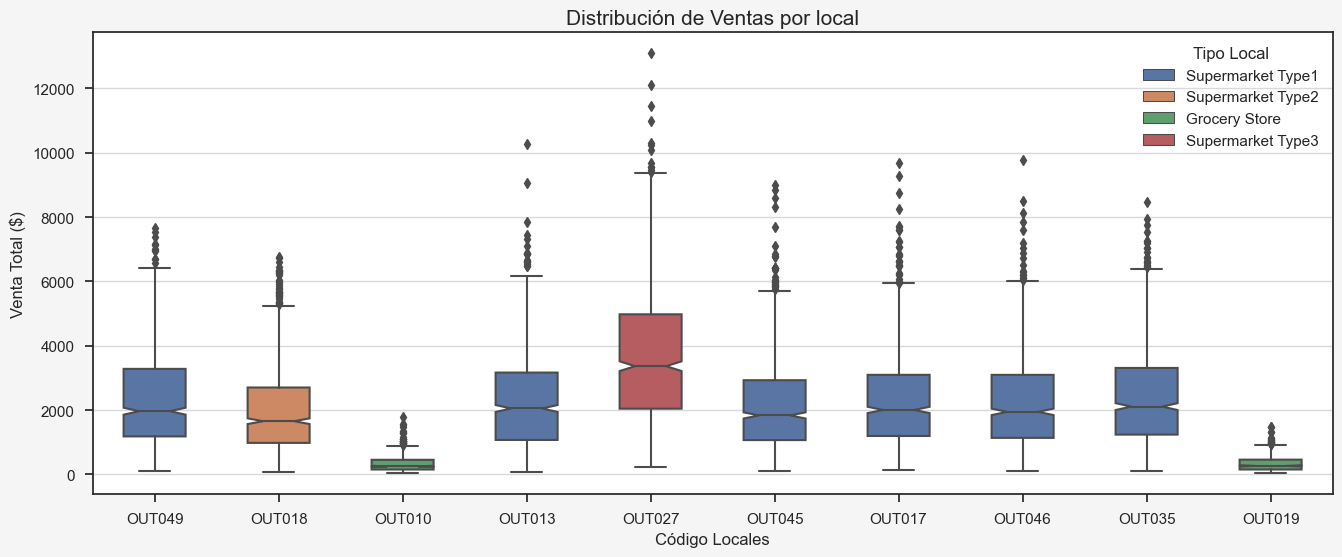

In [888]:
sns.set()
sns.set_style("ticks", {'axes.grid' : True, 'figure.facecolor': 'whitesmoke', 'grid.color': '.85'})
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="Outlet_Identifier", y="Item_Outlet_Sales", hue="Outlet_Type", dodge =False, width=.5,  notch=True,)
plt.ylabel('Venta Total ($)')
plt.xlabel('Código Locales')
plt.legend(title="Tipo Local", shadow=True)
plt.title("Distribución de Ventas por local", {"fontsize":15});

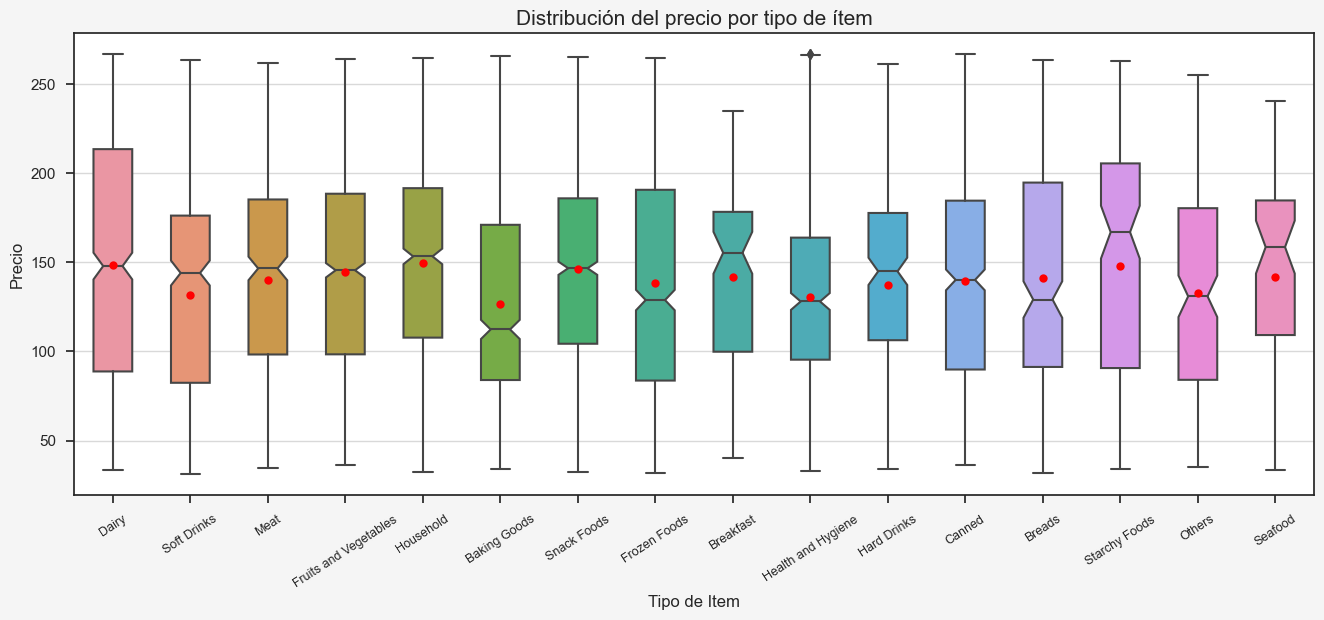

In [889]:
#https://datavizpyr.com/show-mean-mark-on-boxplot-using-seaborn-in-python/

plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="Item_Type", y="Item_MRP", width=.5,  notch=True, showmeans=True, meanprops={"markerfacecolor":"red", "marker":"o"})
plt.ylabel('Precio')
plt.xlabel('Tipo de Item')
plt.xticks(rotation = 33, fontsize=9)
plt.title("Distribución del precio por tipo de ítem", {"fontsize":15});

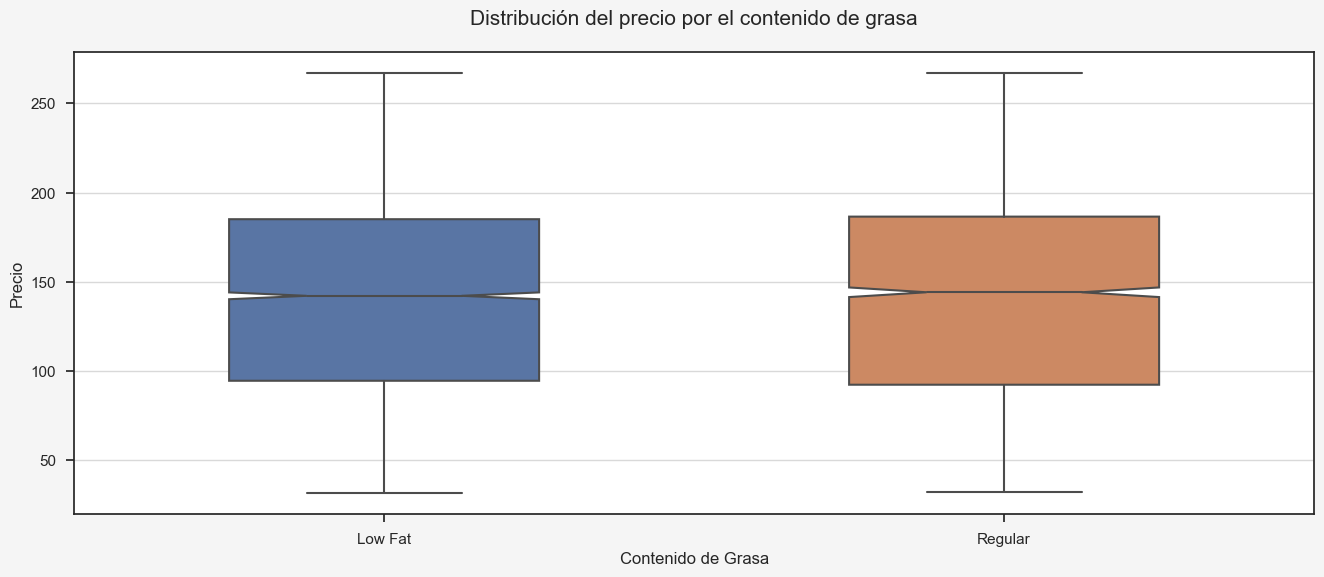

In [890]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x="Item_Fat_Content", y="Item_MRP", width=.5,  notch=True,)
plt.ylabel('Precio')
plt.xlabel('Contenido de Grasa')
plt.title("Distribución del precio por el contenido de grasa", {"fontsize":15}, pad=20);

## Mapa de calor de la correlación entre las características.

In [891]:
corr = df.corr(numeric_only = True)

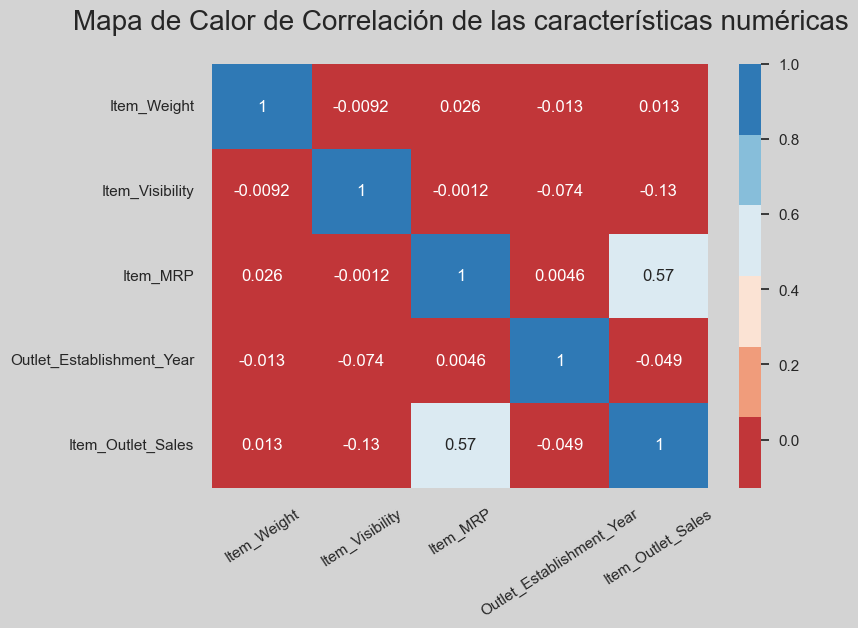

In [892]:
sns.set()
sns.set_style( {'figure.facecolor': 'lightgrey'})
sns.heatmap(corr, cmap=sns.color_palette("RdBu"), annot = True);
plt.xticks(rotation = 33)
plt.title("Mapa de Calor de Correlación de las características numéricas", {"fontsize":20}, pad=25);